# Data analysis :  Gender disparities in police stops accross the United States


In [1]:
# Libraries needed 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from pathlib import Path
import scipy.stats as stats

import collections 
from collections import Counter

#Plot with plotly for website
import plotly.graph_objects as go
import plotly.io as pio

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


## Data wrangling
- Datasets choice and loading
- Filtering of incomplete rows and unnecessary features
- Formatting

The datasets handled are : 
- Set 1 : NC (Charlotte, Greensboro, Raleigh), Austin (TX), CA (San Diego), Maryland state (MD)
- Set 2 : NC (Charlotte, Greensboro, Raleigh), CA (San Diego and San Francisco), Nashville (TN), New Orleans (Louisiana), Maryland state (MD)
- Case study : Florida state (FL)

Also available : Washington state (WA) with officers' gender, Louisville (Kentucky), and Pittsburgh (Philadelphia) for female police officer fraction computation. 

For the different analysis of our study, there are mandatory features that must appear in each dataset in order to be able to fulfill our analysis. These are listed before each section in this notebook. Remaining interesting features are let in the filtered datasets, for potential data description. 
Some extra effort was moreover given to find various state and cities accross the USA that differ geographically, and on their potential sexist bias. Indeed, sexism could differ from state to state (which is one of the research question of this work), hence the datasets are commented by an indication on whether the state is a priori sexist or not, following https://www.chicagotribune.com/nation-world/ct-america-most-sexist-places-20180821-story.html. 

### For set 1 : 
    - age, gender, race
    - reason for search + search_person and search_vehicle
    - contraband_found
    
    
North Carolina : Charlotte, Greensboro and Raleigh - very sexist

In [2]:
# North Carolina 
df_charlotte = pd.read_csv('data_P4/yg821jf8611_nc_charlotte_2020_04_01.csv.zip', compression='zip')
df_raleigh = pd.read_csv('data_P4/yg821jf8611_nc_raleigh_2020_04_01.csv.zip', compression='zip')
df_greensboro = pd.read_csv('data_P4/yg821jf8611_nc_greensboro_2020_04_01.csv.zip', compression='zip')
name = ['Charlotte','Raleigh','Greensboro']

for idx,df in enumerate([df_charlotte, df_raleigh, df_greensboro]):
    print('\n For : '+str(name[idx]))
    print(set(df.columns))
    print('Dimensions of dataframe before filtering :'+str(df.shape))
    
    # filtering 
    df.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search'], inplace=True)
    df.drop(df.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
    
    print('Dimensions of dataframe after :'+str(df.shape))
    print(df.head())


 For : Charlotte
{'search_vehicle', 'officer_id_hash', 'county_name', 'outcome', 'date', 'raw_row_number', 'contraband_found', 'reason_for_search', 'contraband_weapons', 'subject_age', 'reason_for_stop', 'raw_action_description', 'location', 'search_basis', 'arrest_made', 'raw_Ethnicity', 'reason_for_frisk', 'search_person', 'contraband_drugs', 'subject_race', 'raw_Race', 'search_conducted', 'warning_issued', 'frisk_performed', 'type', 'subject_sex', 'department_name', 'time', 'citation_issued'}
Dimensions of dataframe before filtering :(1598453, 29)
Dimensions of dataframe after :(92878, 13)
    subject_age subject_race subject_sex  arrest_made  citation_issued  \
81         21.0        black        male         True            False   
82         21.0        black        male         True            False   
90         25.0        black        male         True            False   
91         25.0        black        male         True            False   
92         25.0        black 

San Diego (California) - not so sexist
- without frisk information

In [3]:
df_sandiego = pd.read_csv('data_P4/without_frisk_performed/yg821jf8611_ca_san_diego_2020_04_01.csv.zip', compression='zip')

print('\n For : San Diego')
print(set(df_sandiego.columns))
print('Dimensions of dataframe before filtering :'+str(df_sandiego.shape))
#filtering
df_sandiego.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search'], inplace=True)
df_sandiego.drop(df_sandiego.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print('Dimensions of dataframe after :'+str(df_sandiego.shape))
print(df_sandiego.head())


 For : San Diego
{'search_vehicle', 'outcome', 'date', 'raw_row_number', 'contraband_found', 'reason_for_search', 'subject_age', 'raw_action_taken', 'reason_for_stop', 'search_basis', 'arrest_made', 'search_person', 'subject_race', 'search_conducted', 'warning_issued', 'raw_subject_race_description', 'type', 'subject_sex', 'time', 'citation_issued', 'service_area'}
Dimensions of dataframe before filtering :(383027, 21)
Dimensions of dataframe after :(13446, 11)
     subject_age subject_race subject_sex arrest_made citation_issued  \
80          25.0     hispanic        male       False           False   
127         28.0     hispanic        male       False            True   
171         27.0     hispanic      female       False            True   
193         55.0        black        male       False           False   
221         36.0        white        male       False            True   

    warning_issued contraband_found search_person search_vehicle  \
80            True        

Austin (TX) - very sexist

In [4]:
df_austin = pd.read_csv('data_P4/yg821jf8611_tx_austin_2020_04_01.csv.zip', compression='zip')

print('\n For : San Diego')
print(set(df_austin.columns))
print('Dimensions of dataframe before filtering :'+str(df_austin.shape))
#filtering
df_austin.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'raw_person_search_search_based_on'], inplace=True)
df_austin.drop(df_austin.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'raw_person_search_search_based_on', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print('Dimensions of dataframe after :'+str(df_austin.shape))
#formatting
df_austin = df_austin.rename(columns={'raw_person_search_search_based_on': 'reason_for_search'})
print(df_austin.head())


 For : San Diego
{'search_vehicle', 'officer_id_hash', 'date', 'raw_row_number', 'contraband_found', 'contraband_weapons', 'subject_age', 'raw_ethnicity', 'raw_person_search_search_discovered', 'reason_for_stop', 'raw_person_searched', 'raw_street_check_description', 'search_basis', 'vehicle_registration_state', 'raw_vehicle_search_search_based_on', 'vehicle_make', 'raw_vehicle_search_search_discovered', 'search_person', 'contraband_drugs', 'raw_race_description', 'subject_race', 'vehicle_model', 'raw_person_search_search_based_on', 'search_conducted', 'raw_vehicle_searched', 'frisk_performed', 'type', 'vehicle_year', 'subject_sex'}
Dimensions of dataframe before filtering :(483255, 29)
Dimensions of dataframe after :(15039, 9)
     subject_age subject_race subject_sex contraband_found  frisk_performed  \
406         19.0        black        male             True            False   
416         27.0        black        male            False             True   
420         56.0     his

Maryland - least sexist state

In [5]:
df_MD = pd.read_csv('data_P4/without_frisk_performed/yg821jf8611_md_statewide_2020_04_01.csv.zip', compression='zip')

print('\n For : Maryland')
print(set(df_MD.columns))
print('Dimensions of dataframe before filtering :'+str(df_MD.shape))
#filtering
df_MD.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search'], inplace=True)
df_MD.drop(df_MD.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print('Dimensions of dataframe after :'+str(df_MD.shape))
print(df_MD.head())

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,9,10,11,12,13,14,15,16,17,19,20,21,22,23,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For : Maryland
{'search_vehicle', 'outcome', 'date', 'raw_row_number', 'contraband_found', 'reason_for_search', 'contraband_weapons', 'subject_age', 'reason_for_stop', 'location', 'search_basis', 'raw_Outcome', 'disposition', 'arrest_made', 'raw_Arrest_Made', 'violation', 'search_person', 'contraband_drugs', 'subject_race', 'raw_Race', 'search_conducted', 'warning_issued', 'reason_for_arrest', 'type', 'subject_sex', 'department_name', 'time', 'citation_issued'}
Dimensions of dataframe before filtering :(3669665, 28)
Dimensions of dataframe after :(28363, 11)
         subject_age subject_race subject_sex arrest_made citation_issued  \
2312659         59.0        black        male        True           False   
2312729         43.0        white      female        True           False   
2312735         47.0        white        male       False           False   
2312736         33.0        white        male        True           False   
2312782         24.0        white      female   

### For set 2 :
    - age, gender, race
    - reason for stop + contraband found
    - citation OR warning OR arrest

San Francisco (California) - not so sexist

- without frisk information

In [6]:
df_sanfrancisco = pd.read_csv('data_P4/without_frisk_performed/yg821jf8611_ca_san_francisco_2020_04_01.csv.zip', compression='zip')

print('\n For San Francisco')
print(set(df_sanfrancisco.columns))
print('Dimensions of dataframe before filtering :'+str(df_sanfrancisco.shape))
#filtering 
df_sanfrancisco.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'reason_for_stop'], inplace=True)
df_sanfrancisco.drop(df_sanfrancisco.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print('Dimensions of dataframe after :'+str(df_sanfrancisco.shape))
print(df_sanfrancisco.head())    

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For San Francisco
{'search_vehicle', 'outcome', 'date', 'raw_row_number', 'contraband_found', 'district', 'subject_age', 'reason_for_stop', 'location', 'lat', 'lng', 'search_basis', 'arrest_made', 'raw_result_of_contact_description', 'subject_race', 'search_conducted', 'warning_issued', 'type', 'subject_sex', 'raw_search_vehicle_description', 'time', 'citation_issued'}
Dimensions of dataframe before filtering :(905070, 22)
Dimensions of dataframe after :(49599, 9)
       subject_age subject_race subject_sex  arrest_made  citation_issued  \
33182         39.0     hispanic        male         True            False   
33185         24.0     hispanic      female         True            False   
33192         24.0        white        male        False            False   
33210         27.0        white        male        False            False   
33211         48.0        black        male        False             True   

       warning_issued contraband_found  search_vehicle  \
33182   

Nashville (Tennessee) - very sexist

In [7]:
df_nashville = pd.read_csv('data_P4/yg821jf8611_tn_nashville_2020_04_01.csv.zip', compression='zip')

print('\n For Nashville (TN)')
print(set(df_nashville.columns))
print('Dimensions of dataframe before filtering :'+str(df_nashville.shape))
#filtering 
df_nashville.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'reason_for_stop'], inplace=True)
df_nashville.drop(df_nashville.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print('Dimensions of dataframe after :'+str(df_nashville.shape))
print(df_nashville.head())

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For Nashville (TN)
{'zone', 'search_vehicle', 'officer_id_hash', 'outcome', 'raw_verbal_warning_issued', 'raw_search_warrant', 'date', 'raw_row_number', 'contraband_found', 'contraband_weapons', 'subject_age', 'raw_search_consent', 'reason_for_stop', 'location', 'lat', 'lng', 'notes', 'search_basis', 'vehicle_registration_state', 'arrest_made', 'reporting_area', 'raw_search_arrest', 'raw_traffic_citation_issued', 'raw_search_inventory', 'raw_misd_state_citation_issued', 'raw_driver_searched', 'violation', 'precinct', 'search_person', 'contraband_drugs', 'raw_written_warning_issued', 'subject_race', 'search_conducted', 'warning_issued', 'frisk_performed', 'type', 'subject_sex', 'raw_passenger_searched', 'raw_search_plain_view', 'time', 'citation_issued', 'raw_suspect_ethnicity'}
Dimensions of dataframe before filtering :(3092351, 42)
Dimensions of dataframe after :(126411, 11)
    subject_age subject_race subject_sex arrest_made citation_issued  \
4          21.0        black        m

New Orleans (Lousiana) - sexist

In [8]:
df_neworleans = pd.read_csv('data_P4/yg821jf8611_la_new_orleans_2020_04_01.csv.zip', compression='zip')

print('\n For New Orleans (Louisiana)')
print(set(df_neworleans.columns))
print('Dimensions of dataframe before filtering :'+str(df_neworleans.shape))
#filtering 
df_neworleans.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'reason_for_stop'], inplace=True)
df_neworleans.drop(df_neworleans.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)
print('Dimensions of dataframe after :'+str(df_neworleans.shape))
print(df_neworleans.head())

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



 For New Orleans (Louisiana)
{'zone', 'search_vehicle', 'raw_subject_race', 'outcome', 'date', 'raw_row_number', 'contraband_found', 'district', 'contraband_weapons', 'subject_age', 'reason_for_stop', 'location', 'lat', 'lng', 'search_basis', 'officer_assignment', 'arrest_made', 'raw_actions_taken', 'vehicle_make', 'search_person', 'contraband_drugs', 'subject_race', 'vehicle_model', 'search_conducted', 'warning_issued', 'vehicle_color', 'frisk_performed', 'type', 'vehicle_year', 'subject_sex', 'time', 'citation_issued'}
Dimensions of dataframe before filtering :(512092, 32)
Dimensions of dataframe after :(75126, 11)
     subject_age subject_race subject_sex  arrest_made  citation_issued  \
380         27.0        black        male        False            False   
414         18.0        black        male         True            False   
417         24.0        black      female        False             True   
433         52.0        black        male         True             True   

### For the case study : 

Florida state - sexist
- no information on contraband
- officer's gender

In [3]:
df_FL = pd.read_csv('data_P4/yg821jf8611_fl_statewide_2020_04_01.csv.zip', compression='zip')

print(set(df_FL.columns))
print('Dimensions of dataframe :'+str(df_FL.shape))
                            
print('Male officers :'+format(len(df_FL[df_FL['officer_sex']=='male'])))
print('Female officers :'+format(len(df_FL[df_FL['officer_sex']=='female'])))
print('Fraction of women officers stop record before filtering : '+str(326525/4352689))

# filtering
df_FL.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'officer_sex', 'violation', 'reason_for_stop'], inplace=True)
df_FL.drop(df_FL.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'violation', 'officer_sex', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop']), 1, inplace=True)

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,7,10,11,13,14,17,18,19,21,22,23,24,26,27,28,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'type', 'vehicle_registration_state', 'reason_for_stop', 'officer_race', 'search_basis', 'officer_sex', 'time', 'raw_row_number', 'subject_race', 'violation', 'raw_row_number_new', 'raw_EnforcementAction', 'frisk_performed', 'raw_SearchType', 'county_name', 'officer_id_hash', 'raw_row_number_old', 'citation_issued', 'notes', 'date', 'outcome', 'reason_for_search', 'officer_age', 'department_name', 'raw_Ethnicity', 'unit', 'officer_years_of_service', 'raw_Race', 'search_conducted', 'subject_sex', 'warning_issued', 'location', 'subject_age', 'arrest_made'}
Dimensions of dataframe :(7297538, 34)
Male officers :4352689
Female officers :326525
Fraction of women officers stop record before filtering : 0.07501684590835687


### Other available datasets : 

Washington state - middle sexist
 - contains officer's gender 
 - does not contain reason for search nor stop

In [10]:
# Washington state - middle
df_WA = pd.read_csv('data_P4/yg821jf8611_wa_statewide_2020_04_01.csv.zip', compression='zip')
# contains officers' gender

print(set(df_WA.columns))
print('Male officers :'+format(len(df_WA[df_WA['officer_sex']=='male'])))
print('Female officers :'+format(len(df_WA[df_WA['officer_sex']=='female'])))
print('Dimensions of dataframe :'+str(df_WA.shape))
df_WA.dropna(subset=['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_conducted'], inplace=True)
df_WA.drop(df_WA.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop', 'officer_sex' ]), 1, inplace = True)
                                     
print('Male officers :'+format(len(df_WA[df_WA['officer_sex']=='male'])))
print('Female officers :'+format(len(df_WA[df_WA['officer_sex']=='female'])))
print('Dimensions of dataframe :'+str(df_WA.shape))
print('Fraction of women officers stop record before filtering : '+str(721258/10612167)+' fraction after : '+str(13757/225840))
df_WA.head()

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'outcome', 'county_name', 'raw_officer_gender', 'date', 'raw_row_number', 'contraband_found', 'subject_age', 'raw_search_type', 'location', 'lat', 'lng', 'search_basis', 'raw_driver_gender', 'arrest_made', 'raw_officer_race', 'officer_race', 'raw_contact_type', 'officer_sex', 'violation', 'subject_race', 'raw_enforcements', 'search_conducted', 'warning_issued', 'frisk_performed', 'type', 'raw_driver_race', 'subject_sex', 'department_name', 'time', 'citation_issued'}
Male officers :10612167
Female officers :721258
Dimensions of dataframe :(11333425, 30)
Male officers :225840
Female officers :13757
Dimensions of dataframe :(239597, 9)
Fraction of women officers stop record before filtering : 0.06796519504451824 fraction after : 0.060914806942968476


,subject_age,subject_race,subject_sex,officer_sex,arrest_made,citation_issued,warning_issued,contraband_found,frisk_performed
7,18.0,white,male,male,NaN,True,True,False,False
61,47.0,white,male,male,NaN,True,True,False,False
62,23.0,white,male,male,NaN,True,True,False,False
82,44.0,white,male,male,NaN,True,True,True,False
87,35.0,other,female,male,NaN,True,True,False,False


The following are loaded just to show how few female police officer there are : between 4 and 9% of the stop were done by women, based on calculations for Louisville (KY), Pittsburgh (Philadelphia), Washington (state).

In [11]:
# Louisville, KY : sexist 
df_louisville = pd.read_csv('data_P4/yg821jf8611_ky_louisville_2020_04_01.csv.zip', compression='zip')
print(set(df_louisville.columns))
print('Dimensions of dataframe :'+str(df_louisville.shape))

print('Male officers :'+format(len(df_louisville[df_louisville['officer_sex']=='male'])))
print('Female officers :'+format(len(df_louisville[df_louisville['officer_sex']=='female'])))

print('Fraction of women officers stop record before filtering : '+str(4870/105934))

{'raw_driver_age_range', 'outcome', 'date', 'raw_row_number', 'reason_for_search', 'raw_beat', 'subject_age', 'location', 'lat', 'lng', 'search_basis', 'division', 'officer_race', 'raw_activity_division', 'raw_citation_location', 'officer_sex', 'raw_division', 'violation', 'raw_persons_race', 'beat', 'subject_race', 'search_conducted', 'warning_issued', 'raw_was_vehcile_searched', 'frisk_performed', 'raw_persons_ethnicity', 'type', 'raw_activity_beat', 'raw_driver_race', 'subject_sex', 'time', 'citation_issued'}
Dimensions of dataframe :(110960, 32)
Male officers :105934
Female officers :4870
Fraction of women officers stop record before filtering : 0.04597202031453546


In [12]:
# Pittsburgh, Philadelphia : middle 
df_PA_P = pd.read_csv('data_P4/yg821jf8611_pa_pittsburgh_2020_04_01.csv.zip', compression='zip')
print(set(df_PA_P.columns))
print('Dimensions of dataframe :'+str(df_PA_P.shape))
                            
print('Male officers :'+format(len(df_PA_P[df_PA_P['officer_sex']=='male'])))
print('Female officers :'+format(len(df_PA_P[df_PA_P['officer_sex']=='female'])))

print('Fraction of women officers stop record before filtering : '+str(16503/197809))

C:\Users\julie\anaconda3\envs\ada\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,6,12,13,15,16,17,18,20,21,23,24,25,27,28,29,30,31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'officer_id_hash', 'outcome', 'date', 'raw_row_number', 'contraband_found', 'subject_age', 'raw_ethnicity', 'raw_nothing_found', 'reason_for_stop', 'raw_evidence_found', 'location', 'lat', 'lng', 'officer_age', 'neighborhood', 'raw_object_searched', 'arrest_made', 'raw_officer_race', 'officer_race', 'raw_zone_division', 'raw_race', 'officer_sex', 'violation', 'raw_weapons_found', 'raw_zone', 'subject_race', 'search_conducted', 'warning_issued', 'frisk_performed', 'raw_officer_zone', 'type', 'raw_police_zone', 'subject_sex', 'time', 'citation_issued'}
Dimensions of dataframe :(274558, 35)
Male officers :197809
Female officers :16503
Fraction of women officers stop record before filtering : 0.08342896430394978


To save the filtered datasets : 

In [13]:
DF = [df_charlotte, df_raleigh, df_greensboro, df_austin, df_neworleans, df_sandiego, df_sanfrancisco, df_nashville, df_WA, df_MD, df_FL]
name = ['df_charlotte', 'df_raleigh', 'df_greensboro', 'df_austin', 'df_neworleans', 'df_sandiego', 'df_sanfrancisco', 'df_nashville', 'df_WA', 'df_MD', 'df_FL']

for idx,df in enumerate(DF):
    df.to_csv('data_P4/'+name[idx]+'.csv', sep=',', encoding='utf-8')

## Set 1 : Gender disparities in search decisions

The aim of this first part is to compare for W-M pairs the difference in search decision. The following method is applied :
-  compare only individuals presenting similar subjective signals (except gender) to the police officer. For this, the following features are taken into account : 
     - match only person of same race
     - match only person of different gender
     - match only person with the same age range : this one is subjectively determined by assuming that only female under 45 could be attractive enough to generate a significant difference in decision outcome  
     - match only person with the same behaviour during the traffic stop (feature : 'reason_for_search') 
- Compute difference in search decision + confidence intervals
- Fisher exact test to assess if the hit rates are significantly different between W and M. If the difference is not significant, it is no warranted to search a gender more than the other, so the difference in search decision is not justified and we conclude that there is gender discrimination.

Citation and arrest are considered as severe outcome deicisons (1), whereas warning is considered as less severe (0). There is a difference between a person's search and a frisk : the former is more intrusive than the latter (see https://www.carrolltrobermanlaw.com/blog/2018/september/whats-the-difference-between-a-search-and-a-fris/). 


If available, the following information are provided in each dataframe :

    'subject_age'
    'subject_race'
    'subject_sex'
    'contraband_found'
    'search_person'
    'search_vehicle'
    'reason_for_search'
    'citation_issued'
    'warning_issued'
    'arrest_made'
    'frisk_performed'
    'reason_for_frisk'
    'reason_for_stop'
    'officer_sex' (only for WA, FL and Louisville)

The following datasets are used : NC (Charlotte, Greensboro, Raleigh), Austin (TX), CA (San Diego), Maryland state (MD)


Generic functions : 

In [80]:
def DF_handling(df):
    # create a index column
    df['id']= df.index
    
    # Age category (proxy for attractiveness)
    df['attractiveness'] = df.apply(lambda x: True if (x.subject_age<46) else False, axis=1)
    
    return df

def match_pair_search(df, reason_searches):
    # match pairs on race, age range, contraband found (1:yes or 0:no), and search reason
    matching=pd.DataFrame({'men':[],'women':[]})
    AOD = 0
    # Match 1 woman and 1 man with same attributes
    for reason in reason_searches:
        for race in ('white','black','hispanic'):
            for attractiveness in ('True', 'False'):
                for contraband in ('True', 'False'):
                    for s_vehicle in ('True', 'False'):
                        query = "reason_for_search=='"+reason+"' & search_vehicle=="+s_vehicle+" & subject_race=='"+race+"' & attractiveness=="+attractiveness+" & contraband_found=="+contraband
                        data = df.query(query).copy()
                        id_M = np.array(data[data['subject_sex']=='male'].id)
                        id_W = np.array(data[data['subject_sex']=='female'].id)
                        if ((len(id_M)>0) & (len(id_W)>0)):
                            if (len(id_M)>len(id_W)):
                                for i in np.arange(0,len(id_W)):
                                    matching = matching.append({'men':id_M[i],'women':id_W[i]},ignore_index=True)
                              
                            if (len(id_M)<len(id_W)):
                                for i in np.arange(0,len(id_M)):
                                    matching = matching.append({'men':id_M[i],'women':id_W[i]},ignore_index=True)
    return matching

def fisher_exact_test(df):
    
    #matching only on the race to avoir racial bias
    df_white = df[df['subject_race']=='white'].copy()
    df_black = df[df['subject_race']=='black'].copy()
    df_hispanic = df[df['subject_race']=='hispanic'].copy()
    
    size_min = min(len(df_white), len(df_black), len(df_hispanic))
    df_white_reduced = df_white.loc[0:size_min,:].copy()
    df_black_reduced = df_black.loc[0:size_min,:].copy()
    df_hispanic_reduced = df_hispanic.loc[0:size_min,:].copy()
    df_balanced = pd.concat([df_white_reduced,df_white_reduced,df_white_reduced])
    
    df_balanced = df_balanced.dropna(subset=['reason_for_search'])
    N_W_hit = len(df_balanced.query("contraband_found==True and subject_sex=='female'"))
    N_W_not_hit = len(df_balanced.query("contraband_found==False and subject_sex=='female'"))
    N_M_hit = len(df_balanced.query("contraband_found==True and subject_sex=='male'"))
    N_M_not_hit = len(df_balanced.query("contraband_found==False and subject_sex=='male'"))
    
    contingency_table = [[N_M_hit, N_W_hit], [N_M_not_hit, N_W_not_hit]]
    
    hit_rate_male = N_M_hit/(N_M_hit+N_M_not_hit)
    hit_rate_female = N_W_hit/(N_W_hit+N_W_not_hit)
    
    oddsratio, pvalue = stats.fisher_exact(contingency_table)
    
    return pvalue, hit_rate_male, hit_rate_female

def AOD_search(df, matching):
    # Averaged outcome difference (AOD) in search decision s : 
    # if it is positive, men are more strictly reprehended for a given act than woman.
    N_matches = len(matching)
    diff = np.zeros(N_matches)

    for i in np.arange(0,N_matches):
        s_man = int(np.array(df[df['id']==matching.loc[i,'men']].search_person))
        s_woman = int(np.array(df[df['id']==matching.loc[i,'women']].search_person))
        diff[i] = s_man-s_woman                    
    AOD = diff.sum()/N_matches    
    
    return AOD, diff

def bootstrap_CI(data, nbr_draws):
    # Confidence interval
    # Bootstrap CI function from exercise session 2
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 5),np.nanpercentile(means, 95)]

In [85]:
def state(df, n):
    # - compute the reason distribution in order to determine n, the number of reasons that are kept for the analysis.
    # - match the pairs, compute AOD and interval of confidence
    
    df = DF_handling(df)

    # Feature analysis : reason for search
    Counter(df['reason_for_search'])

    # Plot of the possible combination of the reason for search
    plt.figure(figsize=[18,8])
    plt.bar(Counter(df.dropna(subset=['reason_for_search']).reason_for_search).keys(), Counter(df.dropna(subset=['reason_for_search']).reason_for_search).values())
    plt.show()
    
    print('There are %d combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :' %len(Counter(df['reason_for_search']).items()))
    print(list(sorted(Counter(df.dropna(subset=['reason_for_search']).reason_for_search).items(), key=lambda x:x[1],  reverse=True))[:13])

    # Possible reasons for search : n combinations chosen
    reason_searches = sorted(Counter(df['reason_for_search']), key=Counter(df['reason_for_search']).get, reverse = True)[:n]
    
    matching = match_pair_search(df, reason_searches)

    [AOD, diff] = AOD_search(df, matching)

    CI = bootstrap_CI(diff, 1000)

    print('Averaged outcome difference %.4f with [%.4f, %.4f] 95%% confidence intervals' %(AOD, CI[0], CI[1]))
    
    # Fisher test
    pvalue, hit_rate_male, hit_rate_female = fisher_exact_test(df)
    print('Hit rate male: %.4f \nHit rate female: %.4f \npvalue: %.4f (significance of difference in hit rate)' %(hit_rate_male, hit_rate_female, pvalue))

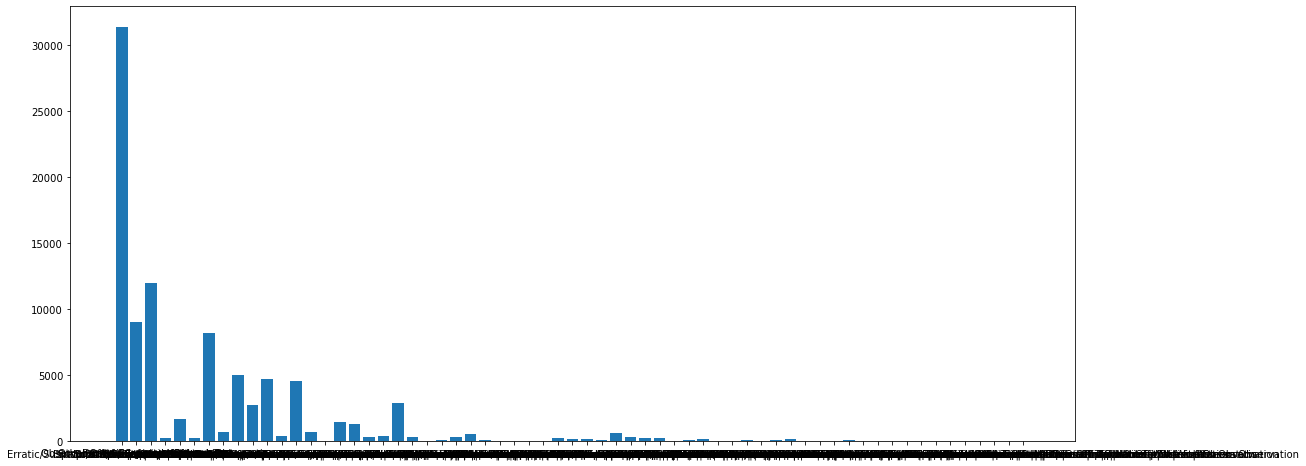

There are 63 combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :
[('Other Official Information', 31331), ('Erratic/Suspicious Behavior', 12003), ('Observation of Suspected Contraband', 9024), ('Erratic/Suspicious Behavior|Suspicious Movement', 8201), ('Erratic/Suspicious Behavior|Other Official Information', 4989), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband', 4738), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband|Suspicious Movement', 4583), ('Erratic/Suspicious Behavior|Suspicious Movement|Other Official Information', 2862), ('Observation of Suspected Contraband|Other Official Information', 2754), ('Suspicious Movement', 1709), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband|Suspicious Movement|Other Official Information', 1468), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband|Other Official Informati

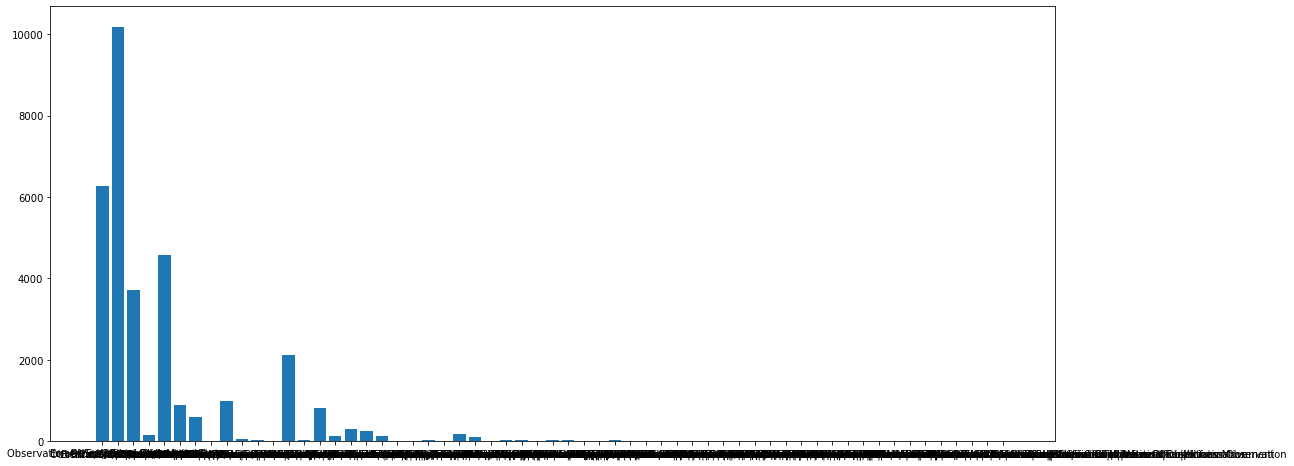

There are 59 combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :
[('Erratic/Suspicious Behavior', 10173), ('Observation of Suspected Contraband', 6268), ('Suspicious Movement', 4574), ('Other Official Information', 3727), ('Erratic/Suspicious Behavior|Informant Tip', 2108), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband', 1002), ('Informant Tip', 903), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband|Informant Tip', 823), ('Erratic/Suspicious Behavior|Suspicious Movement', 607), ('Erratic/Suspicious Behavior|Suspicious Movement|Informant Tip', 312), ('Observation of Suspected Contraband|Suspicious Movement', 262), ('Observation of Suspected Contraband|Informant Tip', 181), ('Witness Observation', 164)]
Averaged outcome difference 0.0765 with [0.0665, 0.0869] 95% confidence intervals
Hit rate male: 0.2569 
Hit rate female: 0.3458 
pvalue: 0.00

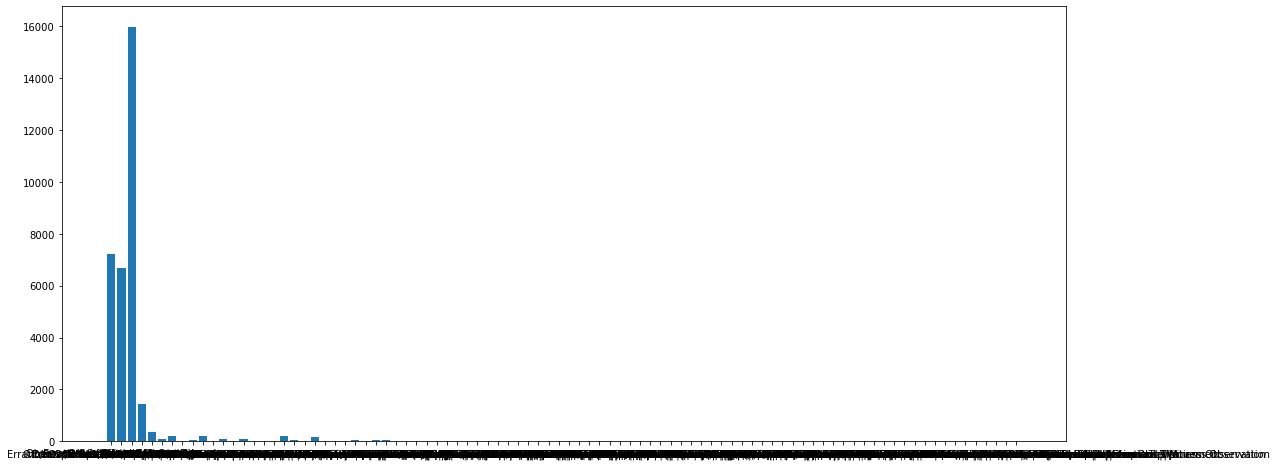

There are 90 combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :
[('Other Official Information', 15967), ('Erratic/Suspicious Behavior', 7207), ('Observation of Suspected Contraband', 6669), ('Suspicious Movement', 1442), ('Witness Observation', 377), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband', 213), ('Erratic/Suspicious Behavior|Other Official Information', 201), ('Erratic/Suspicious Behavior|Suspicious Movement', 192), ('Observation of Suspected Contraband|Other Official Information', 170), ('Informant Tip', 97), ('Observation of Suspected Contraband|Erratic/Suspicious Behavior', 95), ('Other Official Information|Erratic/Suspicious Behavior', 72), ('Erratic/Suspicious Behavior|Observation of Suspected Contraband|Suspicious Movement', 56)]
Averaged outcome difference 0.0270 with [0.0194, 0.0344] 95% confidence intervals
Hit rate male: 0.1863 
Hit rate f

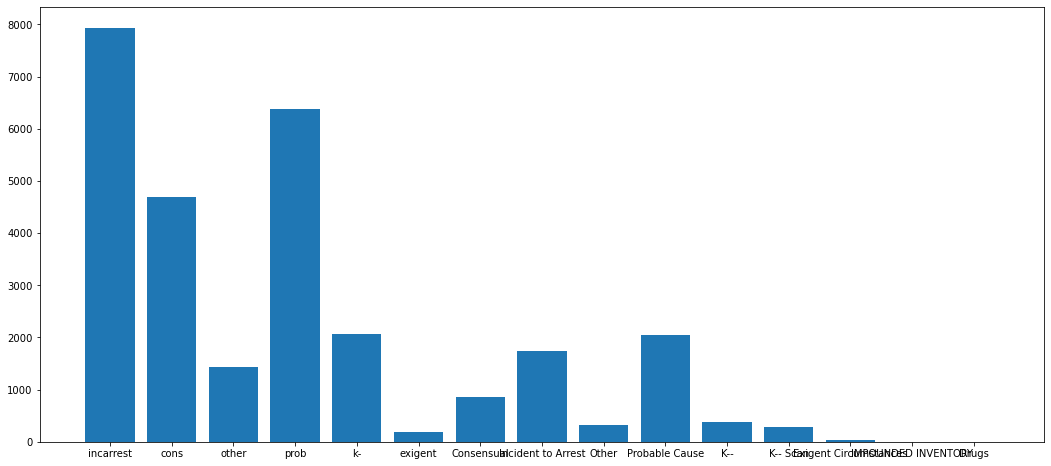

There are 15 combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :
[('incarrest', 7938), ('prob', 6377), ('cons', 4687), ('k-', 2066), ('Probable Cause', 2040), ('Incident to Arrest', 1749), ('other', 1439), ('Consensual', 851), ('K--', 389), ('Other', 325), ('K-- Scan', 282), ('exigent', 183), ('Exigent Circumstances', 35)]
Averaged outcome difference 0.1087 with [0.0966, 0.1219] 95% confidence intervals
Hit rate male: 0.0704 
Hit rate female: 0.0534 
pvalue: 0.0532 (significance of difference in hit rate)

 ---------------------------------------------------------------------------



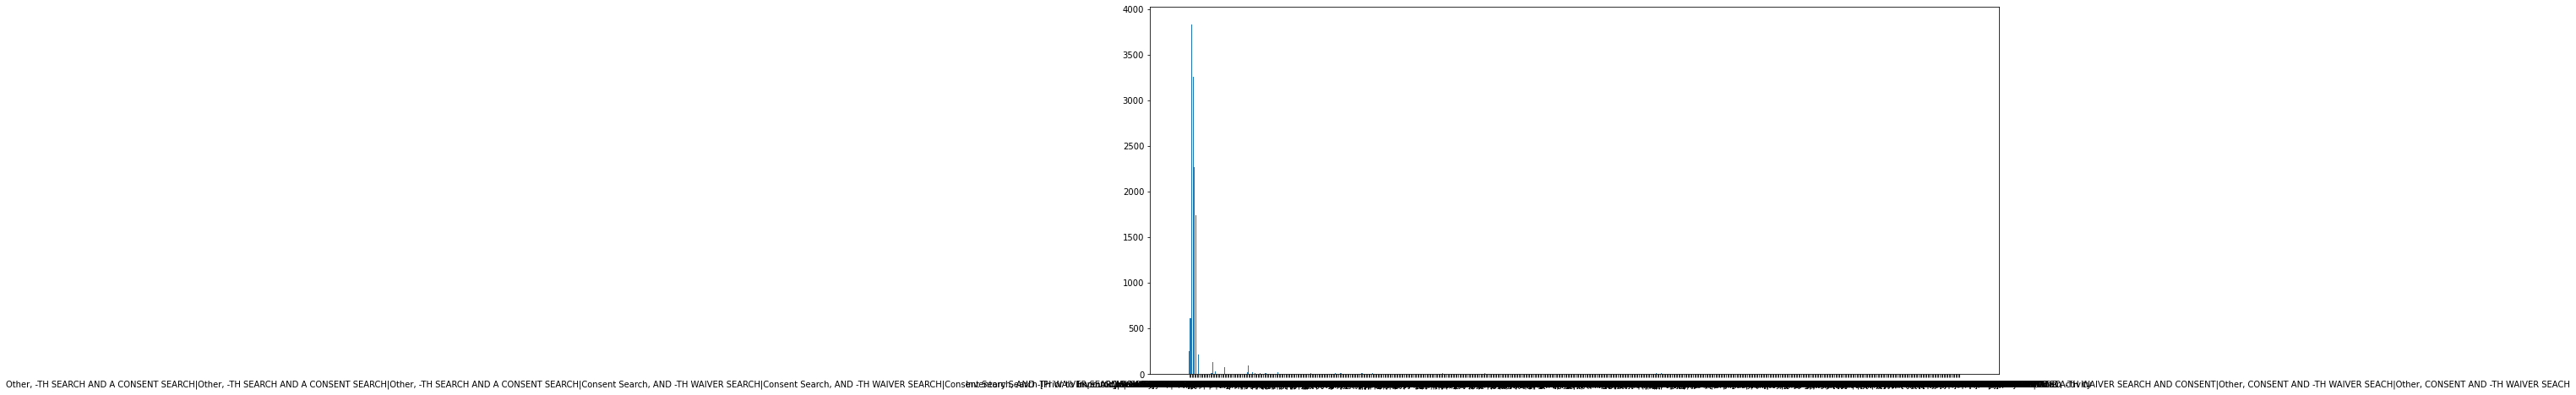

There are 585 combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :
[('Inventory Search [Prior to Impound]', 3832), ('-th Waiver Search', 3260), ('Consent Search', 2273), ('Search incident to Arrest', 1739), ('Inventory Search', 615), ('Odor of Contraband', 252), ('Contraband Visible', 220), ('-h Waiver Search', 133), ('Other', 92), ('Search Incident To Arrest', 79), ('Observed Evidence related to criminal', 34), ('Search Incident To Arrest|Inventory Search', 22), ('Consent Search|-h Waiver Search', 19)]
Averaged outcome difference 0.0624 with [0.0463, 0.0785] 95% confidence intervals
Hit rate male: 0.1574 
Hit rate female: 0.1458 
pvalue: 0.5550 (significance of difference in hit rate)

 ---------------------------------------------------------------------------



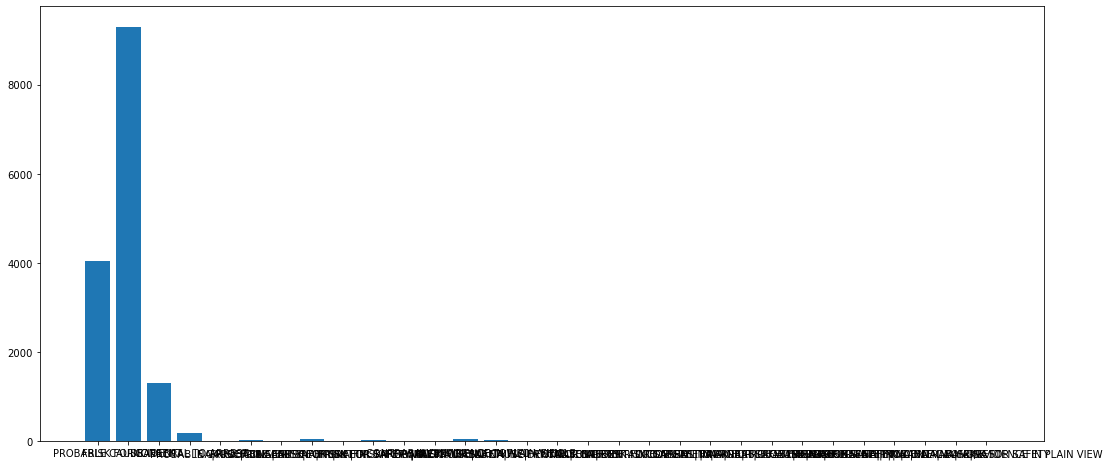

There are 30 combinations of reasons for the policeman to decide to operate a search, among which, the most represented combinations are (in descending order of importance) :
[('FRISK FOR SAFETY', 9289), ('PROBABLE CAUSE', 4040), ('CONSENT', 1299), ('INCIDENTAL TO ARREST', 180), ('CONTRABAND/EVIDENCE IN PLAIN VIEW', 59), ('NA|FRISK FOR SAFETY', 55), ('INVENTORY OF TOWED VEHICLE', 32), ('NA|PROBABLE CAUSE', 22), ('FRISK FOR SAFETY|NA', 21), ('PROBABLE CAUSE|NA', 7), ('NA|CONSENT', 6), ('FRISK FOR SAFETY|CONSENT', 3), ('PROBABLE CAUSE|FRISK FOR SAFETY', 3)]
Averaged outcome difference 0.0497 with [0.0379, 0.0615] 95% confidence intervals
Hit rate male: 0.2471 
Hit rate female: 0.2201 
pvalue: 0.1998 (significance of difference in hit rate)


In [87]:
# Compute the AOD and interval of confidence for each desired state or city
state(df_charlotte, n=3)
print('\n ---------------------------------------------------------------------------\n')
state(df_greensboro, n=4)
print('\n ---------------------------------------------------------------------------\n')
state(df_raleigh, n=3)
print('\n ---------------------------------------------------------------------------\n')
state(df_MD, n=3)
print('\n ---------------------------------------------------------------------------\n')
state(df_sandiego, n=4)
print('\n ---------------------------------------------------------------------------\n')
state(df_austin, n=2)

These results provide an interesting starting point to our analysis : as all AOD are significantly higher than 0, varying between few % uo to more than 10%, the data for these cities and state patrols seem to provide some evidence that bias is present in search decisions. In order to assess this point more rigourously, this study continues by grouping pairs that had their vehicle searched, and those that did not. This will eliminate the data bias possible if we compare people that are so suspicious that their car was also searched to people that did not do much and just get searched physically. 

Note that the choice of n is subjective : its choice can accordingly increase or decrease computational time, without necessarily changing the conclusion. A sensibility analysis was performed on this parameter, on the Charlotte dataset, and results stay constant for values of n = 3 to n = 63 (maximum), hence the realistic value of n = 4 is kept for this dataset. A similar methodology is applied for all other datasets.

In [88]:
def s_vehi_or_not(df, n):
    # executes the matching for the diven dataframe df, with n most representative search reasons
    # splits the matched pairs into 2 sets : drivers that had their vehicle searched, and those who did not.
    # computes the average outcome difference
    
    df = DF_handling(df)

    reason_searches = sorted(Counter(df['reason_for_search']), key=Counter(df['reason_for_search']).get, reverse = True)[:n]

    matching = match_pair_search(df, reason_searches)

    df.index = df['id']
    matching['men']= matching['men'].apply(lambda x: int(x))
    matching['women']= matching['women'].apply(lambda x: int(x))
    matching.index = matching['women']

    search_vehicle_w = dict(tuple(df.loc[matching['women']].groupby('search_vehicle')))
    search_vehicle_m = dict(tuple(df.loc[matching['men']].groupby('search_vehicle')))

    [AOD_vehicule_searched, diff_veh] = AOD_search(df, matching.loc[search_vehicle_w[True].id].reset_index(drop=True))

    [AOD_vehicule_not_searched, diff_no_veh] = AOD_search(df, matching.loc[search_vehicle_w[False].id].reset_index(drop=True))
    
    return [matching, AOD_vehicule_searched, diff_veh, AOD_vehicule_not_searched, diff_no_veh, search_vehicle_w, search_vehicle_m]


In [89]:
def reason_type_search(df, matching, df_w):
    # splits the matched pairs into n sets (n = # of search reason considered)
    # computes the average outcome difference for each group
    
    AOD_searched_ = dict()
    diff_ = dict()
    
    search_reason_w = dict(tuple(df_w.groupby('reason_for_search')))
    
    for idx, reason in enumerate(search_reason_w.keys()):
        [AOD_searched_[idx], diff_[idx]] = AOD_search(df, matching.loc[search_reason_w[reason].id].reset_index(drop=True))
    return AOD_searched_, diff_, search_reason_w.keys()

Example : Charlotte

In [90]:
# As precendently evaluated, n = 4 reasons for search are sufficient to cover well the data of Charlotte (NC).
n = 4

[matching, AOD_vehi_searched, diff_veh, AOD_vehi_not_searched, diff_no_veh, search_vehicle_w, search_vehi_m] = s_vehi_or_not(df_charlotte, n)

CI_veh = bootstrap_CI(diff_veh, 1000)
CI_no_veh = bootstrap_CI(diff_no_veh, 1000)

print(' Searched vehicle : \n AOD for drivers whose car was searched : '+str(AOD_vehi_searched)+' with CI :')
print(str(CI_veh))

[AOD_searched_T, diff_T, ordered_search_reason_T] = reason_type_search(df_charlotte, matching, search_vehicle_w[True])

CI_T = dict()
for idx,d in enumerate(diff_T.values()): 
    CI_T[idx] = bootstrap_CI(d, 1000)

print(str(AOD_searched_T))
print(str(pd.DataFrame(CI_T.values())))
print('For the following reason for search : '+str(pd.DataFrame(ordered_search_reason_T)))


print('\n Non-searched vehicle : \n AOD for drivers whose car was not searched : '+str(AOD_vehi_not_searched)+' with CI :')
print(str(CI_no_veh))

[AOD_searched_F, diff_F, ordered_search_reason_F] = reason_type_search(df_charlotte, matching, search_vehicle_w[False])
    
CI_F = dict()
for idx,d in enumerate(diff_F.values()): 
    CI_F[idx] = bootstrap_CI(d, 1000)

print(str(AOD_searched_F))
print(str(pd.DataFrame(CI_F.values())))
print('For the following reason for search : '+str(pd.DataFrame(ordered_search_reason_F)))

 Searched vehicle : 
 AOD for drivers whose car was searched : 0.06213481544819723 with CI :
[0.05358415277183981, 0.0705429670799487]
{0: 0.0710295291300878, 1: 0.048368953880764905, 2: 0.06173780487804878, 3: 0.06258770698849285}
          0         1
0  0.047087  0.095770
1  0.021372  0.074241
2  0.036585  0.084642
3  0.050800  0.074656
For the following reason for search :                                                  0
0                      Erratic/Suspicious Behavior
1  Erratic/Suspicious Behavior|Suspicious Movement
2              Observation of Suspected Contraband
3                       Other Official Information

 Non-searched vehicle : 
 AOD for drivers whose car was not searched : 0.023270846800258566 with CI :
[0.01616031027795734, 0.030381383322559793]
{0: 0.038314176245210725, 1: 0.0, 2: 0.02564102564102564, 3: 0.02066115702479339}
          0         1
0  0.015326  0.061494
1  0.000000  0.000000
2 -0.051282  0.102564
3  0.013223  0.028099
For the following reason f

These results are not those expected, though they are explainable : if their vehicle is searched, men get more searched for given features than women. However, this difference lowers by about 50% if the car is not searched. This could indicate for example that officers seem to have more confidence in women if they search their car, searching them physically less. 

The displayed CIs and AOD above permit to conclude that if the car is not searched, officers tend to treat drivers more equally than if the car is searched.

## Set 2 : Gender disparities in stop outcome decisions


A quite similar methodology is applied in this second section, this time to determine if stop outcome are depending on the driver's gender. Indeed, an officer could act biased when taking the decision to warn, issue a citation or even arrest. 

If available, the following information are provided in each dataframe :

    'subject_age'
    'subject_race'
    'subject_sex'
    'contraband_found'
    'search_person'
    'search_vehicle'
    'reason_for_search'
    'citation_issued'
    'warning_issued'
    'arrest_made'
    'frisk_performed'
    'reason_for_frisk'
    'reason_for_stop'
    'officer_sex' (only for WA, FL and Louisville)

The following datasets are used : NC (Charlotte, Greensboro, Raleigh), CA (San Diego and San Francisco), Nashville (TN), New Orleans.

### Generic functions : 

In [91]:
def match_pair_stop(df, reason_stops):
    matching=pd.DataFrame({'men':[],'women':[]})
    AOD = 0
    # Match 1 woman and 1 man with same attributes
    for reason in reason_stops:
        for race in ('white','black','hispanic'):
            for attractiveness in ('True', 'False'):
                for contraband in ('True', 'False'):
                    query = "reason_for_stop=='"+reason+"' & subject_race=='"+race+"' & attractiveness=="+attractiveness+" & contraband_found=="+contraband
                    data = df.query(query).copy()
                    id_M = np.array(data[data['subject_sex']=='male'].id)
                    id_W = np.array(data[data['subject_sex']=='female'].id)
                    if ((len(id_M)>0) & (len(id_W)>0)):
                        if (len(id_M)>len(id_W)):
                            for i in np.arange(0,len(id_W)):
                                matching = matching.append({'men':id_M[i],'women':id_W[i]},ignore_index=True)
                          
                        if (len(id_M)<len(id_W)):
                            for i in np.arange(0,len(id_M)):
                                matching = matching.append({'men':id_M[i],'women':id_W[i]},ignore_index=True)
    return matching 

def AOD_stop(df, matching):
    # Averaged outcome difference
    N_matches = len(matching)
    diff = np.zeros(N_matches)
    for i in np.arange(0,N_matches):
        outcome_man = np.array(df[df['id']==matching.loc[i,'men']].outcome)
        outcome_woman = np.array(df[df['id']==matching.loc[i,'women']].outcome)
        diff[i] = outcome_man-outcome_woman                    
    AOD = diff.sum()/N_matches 
    return AOD, diff

In [22]:
def reason_type_stop(df, matching):
    # splits the matched pairs into n sets (n = # of stop reason considered)
    # computes the average outcome difference    
    
    AOD_stopped_ = dict()
    diff_ = dict()
    matching.index = matching['women']
    
    stop_reason_w = dict(tuple(df.loc[matching['women']].groupby('reason_for_stop')))
    stop_reason_m = dict(tuple(df.loc[matching['men']].groupby('reason_for_stop')))
    
    for idx, reason in enumerate(stop_reason_w.keys()):
        [AOD_stopped_[idx], diff_[idx]] = AOD_stop(df, matching.loc[stop_reason_w[reason].id].reset_index(drop=True))
    return AOD_stopped_, diff_, stop_reason_w.keys()

Computation

In [93]:
# Datasets for this section
DF = [df_charlotte, df_raleigh, df_greensboro, df_neworleans, df_sandiego, df_sanfrancisco, df_nashville]
name = ['df_charlotte', 'df_raleigh', 'df_greensboro', 'df_neworleans', 'df_sandiego', 'df_sanfrancisco', 'df_nashville']

In [94]:
for idx,df in enumerate(DF):
    print('DATASET : '+str(name[idx]))
    df = DF_handling(df)
    
    # Outcome value: arrest, citation = 1 and warning = 0
    df['outcome'] = df.apply(lambda x: 1 if (x.arrest_made or x.citation_issued) else 0, axis=1)

    # Possible reasons for stop
    reason_stops = list(Counter(df['reason_for_stop']).keys())
    print(Counter(df['reason_for_stop']))
    
    #debugging
    if name[idx] == 'df_sandiego':
        del reason_stops[13]
        
    matching = match_pair_stop(df, reason_stops)
    
    [AOD, diff] = AOD_stop(df, matching)
    
    CI = bootstrap_CI(diff, 1000)

    print('Averaged outcome difference %.4f with [%.4f, %.4f] 95%% confidence intervals' %(AOD, CI[0], CI[1]))
    
    # Saving the results for New Orleans
    if name[idx] == 'df_neworleans':
        matching_newO = matching
        AOD_newO = AOD
        diff_newO = diff
        CI_newO = CI
        
    print('\n ---------------------------------------------------------------------------\n')


DATASET : df_charlotte
Counter({'Vehicle Regulatory Violation': 27893, 'Vehicle Equipment Violation': 14280, 'Investigation': 12125, 'Speed Limit Violation': 10800, 'Other Motor Vehicle Violation': 7564, 'Safe Movement Violation': 6156, 'Seat Belt Violation': 5028, 'Stop Light/Sign Violation': 4806, 'Driving While Impaired': 3912, 'Checkpoint': 314})
Averaged outcome difference 0.0245 with [0.0162, 0.0328] 95% confidence intervals

 ---------------------------------------------------------------------------

DATASET : df_raleigh
Counter({'Vehicle Regulatory Violation': 7700, 'Driving While Impaired': 6686, 'Other Motor Vehicle Violation': 4184, 'Investigation': 3868, 'Vehicle Equipment Violation': 3579, 'Speed Limit Violation': 3183, 'Safe Movement Violation': 1797, 'Stop Light/Sign Violation': 1483, 'Seat Belt Violation': 766, 'Checkpoint': 44})
Averaged outcome difference 0.0775 with [0.0676, 0.0865] 95% confidence intervals

 ---------------------------------------------------------

Example : New Orleans

In [96]:
#From the stored data above
print('AOD :',AOD_newO, ' with CI at 95%', CI_newO)

[AOD_stopped__, diff__, ordered_reasons__] = reason_type_stop(df_neworleans, matching_newO)

CI_newO = dict()
for idx,d in enumerate(diff__.values()): 
    CI_newO[idx] = bootstrap_CI(d, 1000)

AOD : -0.07148318042813456  with CI at 95% [-0.0779816513761468, -0.06513379204892966]


In [97]:
print('AOD for all %d reasons for stop :' %len(ordered_reasons__))
print(str(pd.DataFrame(AOD_stopped__.values()))+'\n with CI of \n'+str(pd.DataFrame(CI_newO.values())))
print('The order of the reasons are : '+str(pd.DataFrame(ordered_reasons__)))

AOD for all 10 reasons for stop :
          0
0 -0.094762
1 -0.218905
2 -0.017391
3 -0.028902
4 -0.037736
5 -0.081232
6 -0.130435
7 -0.138060
8 -0.006369
9 -0.049328
 with CI of 
          0         1
0 -0.105817 -0.082653
1 -0.288557 -0.149254
2 -0.027329 -0.007422
3 -0.092486  0.028902
4 -0.075472  0.000000
5 -0.109244 -0.053221
6 -0.260870  0.021739
7 -0.163433 -0.111940
8 -0.082803  0.076433
9 -0.059154 -0.040295
The order of the reasons are :                         0
0        CALL FOR SERVICE
1         CITIZEN CONTACT
2      CRIMINAL VIOLATION
3            FLAGGED DOWN
4      JUVENILE VIOLATION
5                   OTHER
6  PRESENT AT CRIME SCENE
7          SUSPECT PERSON
8         SUSPECT VEHICLE
9       TRAFFIC VIOLATION


These results indicate some clear tendency for the officers to be biased in New Orleans, but this time the bias is inversed : women tend to be more severely punished. 

- 'CALL FOR SERVICE', 'CITIZEN CONTACT', 'CRIMINAL and TRAFFIC VIOLATION' and 'SUSPECT PERSON' are the reason for stop and consecutive potential violations that experience biased decisions towards the drivers.

## Case study : Gender disparities in Florida state policing 

This case study aims to dig into even more details concerning stop decisions. Indeed, up to now, it was not possible to assess the gender of the officers, as this feature is very rare in the available dataset : only 8 states or cities have this information, and most of the time it is not coupled with the other features required for our analysis, such as for example reason for stop. 

This third section hence assesses a potential bias in stop outcome decisions, influenced by the officer's gender. This further analysis is motivated by the fact that men and women officers could be influenced by the driver's gender in their decision to punish him/her. 

For this case study, Florida state is one of the very few showcasing all required features. The methodology resembles the one applied for previous section 2.

In [15]:
# Formatting
df_FL['id']=df_FL.index
df_FL.drop(df_FL.columns.difference(['subject_age', 'subject_race', 'subject_sex', 'contraband_found', 'search_person', 'search_vehicle', 'reason_for_search', 'citation_issued','warning_issued','arrest_made', 'frisk_performed', 'reason_for_frisk', 'reason_for_stop', 'officer_sex', 'violation','attractiveness', 'id', 'result']), 1, inplace = True)


print('Remember that :')                    
print('Male officers :'+format(len(df_FL[df_FL['officer_sex']=='male'])))
print('Female officers :'+format(len(df_FL[df_FL['officer_sex']=='female'])))
print('Fraction of women officers stop record before filtering : '+str(len(df_FL[df_FL['officer_sex']=='female'])/len(df_FL[df_FL['officer_sex']=='male'])))

Remember that :
Male officers :3201883
Female officers :252026
Fraction of women officers stop record before filtering : 0.07871180802046795


This very low relative number of records for women officers compared to men is remarkable, yet not a problem for this study, as the datasets are still big. 

In [5]:
# Show the most represented reasons for stop
sorted(Counter(df_FL.violation).items(), key=lambda x:x[1], reverse=True)[:10]

[('SPEED', 1324271),
 ('SEATBELT (DRIVER)', 147232),
 ('SPEED|PROOF OF INSURANCE', 117248),
 ('VIOLATIONS OF TRAFFIC CONTROL DEVICE', 99263),
 ('FAULTY EQUIPMENT', 96718),
 ('CMV INSPECTION', 95419),
 ('OTHER MOVING VIOLATIONS', 70159),
 ('SPEED|FAULTY EQUIPMENT', 58354),
 ('SPEED|OTHER TAG / REGISTRATION VIOLATIONS', 52049),
 ('EXPIRED TAG (6 MONTHS OR LESS)', 45838)]

In [6]:
# filtering out the incomplete rows
df_FL.dropna(subset=['subject_age', 'subject_race', 'citation_issued', 'arrest_made', 'subject_sex', 'officer_sex', 'violation', 'reason_for_stop'], inplace=True)

# Age categorie (proxy for attractiveness)
df_FL['attractiveness'] = df_FL.apply(lambda x: True if (x.subject_age<46) else False, axis=1)

# Outcome value: arrest, citation = 1 and warning = 0
df_FL['result'] = df_FL.apply(lambda x: 1 if (x.arrest_made or x.citation_issued) else 0, axis=1)

In [8]:
print('# of possible reasons : '+str(len(sorted(Counter(df_FL['reason_for_stop']).items(), key=lambda x:x[1], reverse=True))))
print(sorted(Counter(df_FL['reason_for_stop']).items(), key=lambda x:x[1], reverse=True)[:11])

# Chosen reason for stop
reason_stops = dict(sorted(Counter(df_FL['reason_for_stop']).items(), key=lambda x:x[1], reverse=True)[:11]).keys()
sum(sorted(Counter(df_FL['reason_for_stop']).values(), reverse=True)[:11])/df_FL.shape[0]

# of possible reasons : 1775
[('SPEED', 2044626), ('SEATBELT (DRIVER)', 280676), ('FAULTY EQUIPMENT', 171141), ('VIOLATIONS OF TRAFFIC CONTROL DEVICE', 148494), ('CMV INSPECTION', 134115), ('OTHER MOVING VIOLATIONS', 115056), ('EXPIRED TAG (- MONTHS OR LESS)', 90447), ('MOVE OVER LAW', 59723), ('WINDOW TINT', 55889), ('OTHER TAG / REGISTRATION VIOLATIONS', 53062), ('OTHER NON MOVING VIOLATIONS', 52691)]


0.9282004824099304

We keep only those 11 first categories as they are the most representative reason for stop and cover 92% of all stops recorded in the filtered dataset df_FL. 

Now, the stops will be devided in 2 dataframes, for women and men officers respectively, in order to later analyse differences in outcome. 

In [16]:
grouped = dict(tuple(df_FL.groupby('officer_sex')))

# Reducing these big datasets to speed up the process
new_group_Woff = grouped['female'].sample(n=30000)
new_group_Moff = grouped['male'].sample(n=30000)

**Generic functions :**

In [17]:
def matching_stop(df, reason_stops):
    matching=pd.DataFrame({'men':[],'women':[]})
    AOD = 0
    # Match 1 woman and 1 man with same attributes
    for reason in reason_stops:
        for race in ('white','black','hispanic'):
            for attractiveness in ('True', 'False'):
                query = "reason_for_stop=='"+reason+"' & subject_race=='"+race+"' & attractiveness=="+attractiveness
                data = df.query(query).copy()
                id_M = np.array(data[data['subject_sex']=='male'].id)
                id_W = np.array(data[data['subject_sex']=='female'].id)
                if ((len(id_M)>0) & (len(id_W)>0)):
                    if (len(id_M)>len(id_W)):
                        for i in np.arange(0,len(id_W)):
                            matching = matching.append({'men':id_M[i],'women':id_W[i]},ignore_index=True)
                          
                    if (len(id_M)<len(id_W)):
                        for i in np.arange(0,len(id_M)):
                            matching = matching.append({'men':id_M[i],'women':id_W[i]},ignore_index=True)
                       
    return matching   

def AOD_stop(df, matching):
    # Averaged outcome difference (AOD) in search decision s 
    N_matches = len(matching)
    diff = np.zeros(N_matches)

    for i in np.arange(0,N_matches):
        s_man = int(np.array(df[df['id']==matching.loc[i,'men']].result))
        s_woman = int(np.array(df[df['id']==matching.loc[i,'women']].result))
        diff[i] = s_man-s_woman                    
    AOD = diff.sum()/N_matches    
    
    return AOD, diff

def bootstrap_CI(data, nbr_draws):
    # Confidence interval
    # Bootstrap CI function from exercise session 2
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 5),np.nanpercentile(means, 95)]

Computation of average outcome difference for the female officers group, and the male officers group. 

In [18]:
matching_W = matching_stop(new_group_Woff, reason_stops)
matching_M = matching_stop(new_group_Moff, reason_stops)

In [19]:
#For women officer, matching1
[AOD_w, diff_w] = AOD_stop(df_FL, matching_W)

CI_w = bootstrap_CI(diff_w, 1000)

print('Averaged outcome difference %.4f with [%.4f, %.4f] 95%% confidence intervals' %(AOD_w, CI_w[0], CI_w[1]))

Averaged outcome difference -0.0043 with [-0.0137, 0.0046] 95% confidence intervals


In [20]:
#For men officer, matching2
[AOD_m, diff_m] = AOD_stop(df_FL, matching_M)

CI_m = bootstrap_CI(diff_m, 1000)

print('Averaged outcome difference %.4f with [%.4f, %.4f] 95%% confidence intervals' %(AOD_m, CI_m[0], CI_m[1]))

Averaged outcome difference 0.0249 with [0.0149, 0.0342] 95% confidence intervals


These results already provide some useful information. The AOD for the woman officers is near 0, and the confidence interval ranges from negative to positive values : at this point, it is not possible to determine whether woman officers take biased decisions. However, it seems different for men : their average outcome when deciding on the outcome of a stop seems to indicate that they tend to search men more than woman drivers, even if the age range, race, subjective indicator (reason for stop) are identical for them. 

Let's dig further, to determine if this seamingly biased behavior is linked to the type of reason for stop. This feature is chosen as it is the most likely to induce a bias, if any. It is important to look for the impact of grouping the matched pairs, as indeed, the AOD is matched over all matched pairs, hence some pairs could cancel eachother.

In [23]:
[AOD_stopped_W, diff_W, ordered_reasons_W] = reason_type_stop(df_FL, matching_W)
[AOD_stopped_M, diff_M, ordered_reasons_M] = reason_type_stop(df_FL, matching_M)

CI_W = dict()
CI_M = dict()

for idx,d in enumerate(diff_W.values()): 
    CI_W[idx] = bootstrap_CI(d, 1000)
    

for idx,d in enumerate(diff_M.values()): 
    CI_M[idx] = bootstrap_CI(d, 1000)

In [24]:
print('AOD for all %d reasons for stop :' %len(ordered_reasons_W))
print(str(pd.DataFrame(AOD_stopped_W.values()))+'\n with CI of \n'+str(pd.DataFrame(CI_W.values())))
print('The order of the reasons are : '+str(pd.DataFrame(ordered_reasons_W)))

AOD for all 11 reasons for stop :
           0
0  -0.058824
1  -0.007143
2   0.071429
3  -0.035354
4   0.044226
5   0.035211
6   0.010989
7   0.010702
8  -0.016465
9   0.006969
10  0.000000
 with CI of 
           0         1
0  -0.176471  0.000000
1  -0.054762  0.035833
2   0.016667  0.123810
3  -0.095960  0.035354
4  -0.004914  0.098280
5  -0.049296  0.119718
6  -0.120879  0.131868
7  -0.008323  0.030916
8  -0.027860 -0.003854
9  -0.033101  0.045296
10 -0.145455  0.145455
The order of the reasons are :                                        0
0                         CMV INSPECTION
1         EXPIRED TAG (- MONTHS OR LESS)
2                       FAULTY EQUIPMENT
3                          MOVE OVER LAW
4                OTHER MOVING VIOLATIONS
5            OTHER NON MOVING VIOLATIONS
6    OTHER TAG / REGISTRATION VIOLATIONS
7                      SEATBELT (DRIVER)
8                                  SPEED
9   VIOLATIONS OF TRAFFIC CONTROL DEVICE
10                           WINDOW TIN

In [25]:
print('AOD for all %d reasons for stop :' %len(ordered_reasons_M))
print(str(pd.DataFrame(AOD_stopped_M.values()))+'\n with CI of \n'+str(pd.DataFrame(CI_M.values())))
print('The order of the reasons are : '+str(pd.DataFrame(ordered_reasons_M)))

AOD for all 11 reasons for stop :
           0
0   0.000000
1   0.076923
2   0.084168
3   0.021390
4   0.049669
5   0.040816
6   0.149533
7   0.039933
8   0.010834
9   0.074561
10 -0.030488
 with CI of 
           0         1
0   0.000000  0.000000
1   0.018462  0.129231
2   0.038076  0.134269
3  -0.058824  0.101604
4  -0.016556  0.115894
5  -0.040816  0.132653
6   0.037383  0.252336
7   0.008319  0.069884
8  -0.001703  0.023216
9   0.026316  0.120724
10 -0.128049  0.060976
The order of the reasons are :                                        0
0                         CMV INSPECTION
1         EXPIRED TAG (- MONTHS OR LESS)
2                       FAULTY EQUIPMENT
3                          MOVE OVER LAW
4                OTHER MOVING VIOLATIONS
5            OTHER NON MOVING VIOLATIONS
6    OTHER TAG / REGISTRATION VIOLATIONS
7                      SEATBELT (DRIVER)
8                                  SPEED
9   VIOLATIONS OF TRAFFIC CONTROL DEVICE
10                           WINDOW TIN

Several conclusions can be deduced from these confidence intervals, knowing to which reason for stop they correspond. 

- The reason to stop 'SPEED' has different results for men officers' group than for women officers' group : women are more coarse with female drivers, reprehending them more than male drivers, whereas men officers do not make a significant difference between them. The exact inverse conclusion can be drawn for the 'DRIVER'S SEATBELT' violation : men officers are more gentle with female drivers, whereas female officers do not make any difference. 
- Both men and women officers seem more gentle with female drivers that have faulty equipment.
- Men officers seem particularly biased regarding 'OTHER TAG / REGISTRATION VIOLATIONS', 'EXPIRED TAG (- MONTHS OR LESS)' and 'VIOLATIONS OF TRAFFIC CONTROL DEVICE'  : the AOD is relatively high, hence men officers decide themselves for harder outcomes when facing a male driver. This is however not the case for female officers, acting equally on male and female drivers for these violation types. 
- Female officers seem biased for 'CMV' with female : they tend to let them get away less easily than men drivers.

To illustrate these statements, first, let's show the bar plot the general AOD of female and male officers.

In [34]:
fig = go.Figure()
fig.add_trace(dict(type='bar', y=[''], x=[AOD_m],
                base=0, error_x= dict(type='data',symmetric=False, array=[abs(AOD_m-CI_m[1])],arrayminus=[AOD_m-CI_m[0]],color="crimson"),
                #marker_color='crimson',
                orientation='h',name='Men officers'))
fig.add_trace(dict(type='bar',y=[''], x=[AOD_w],
                base=0, error_x= dict(type='data',symmetric=False, array=[abs(AOD_w-CI_w[1])],arrayminus=[AOD_w-CI_w[0]],color="crimson"),
                #marker_color='crimson',
                orientation='h',name='Women officers'))


fig.update_xaxes(title_text='AOD')
fig.update_yaxes(title_text='Grouped following officers gender')


#fig.update_layout(
#        font = dict(size=18, family='Courier', color="#F5F5F5"),
#        paper_bgcolor='rgba(0,0,0,0)',
#        plot_bgcolor='rgba(0,0,0,0)',
#        autosize=True,
#        title={
#        'text': "Overall AOD for male and female officers",
#        'y':0.9,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top',
#        "font" : dict(size=25, color="#F5F5F5")},
#        dragmode = False,
#    )


fig.show()
#pio.write_html(fig, file='MW_gen_AOD_off.html', auto_open=False)

Then, visualize more in depth for each type of reason.

In [27]:
# Compute the difference between the AOD and the upper and lower bound 
up_M = abs(list(AOD_stopped_M.values())-pd.DataFrame(CI_M.values())[1])
down_M = list(AOD_stopped_M.values())-pd.DataFrame(CI_M.values())[0]

up_W = abs(list(AOD_stopped_W.values())-pd.DataFrame(CI_W.values())[1])
down_W = list(AOD_stopped_W.values())-pd.DataFrame(CI_W.values())[0]

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(ordered_reasons_M), y=list((AOD_stopped_M.values())),
                base=0, error_y= dict(type='data',symmetric=False, array=up_M,arrayminus=down_M,color="crimson"),
                #marker_color='crimson',
                name='Men officers'))

fig.add_trace(go.Bar(x=list(ordered_reasons_W), y=list((AOD_stopped_W.values())),
                base=0,error_y= dict(type='data',symmetric=False, array=up_W,arrayminus=down_W,color="crimson"),
                
                #marker_color='crimson',
                name='Women officers'))

fig.update_xaxes(title_text='Type of violation')
fig.update_yaxes(title_text='AOD')


#fig.update_layout(
#        font = dict(size=18, family='Courier', color="#F5F5F5"),
#        paper_bgcolor='rgba(0,0,0,0)',
#        plot_bgcolor='rgba(0,0,0,0)',
#        autosize=True,
#        title={
#        'text': "AOD for male and female officers for different types of reasons",
#        'y':0.9,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top',
#        "font" : dict(size=25, color="#F5F5F5")},
#        dragmode = False,
#    )


fig.show()
#pio.write_html(fig, file='MW_off.html', auto_open=False)